In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [116]:
data = pd.read_csv("/Users/jongpaduhilao/Desktop/Project_IRIS/iris.csv", index_col = 0)
dataC = data.iloc[:,0:4]

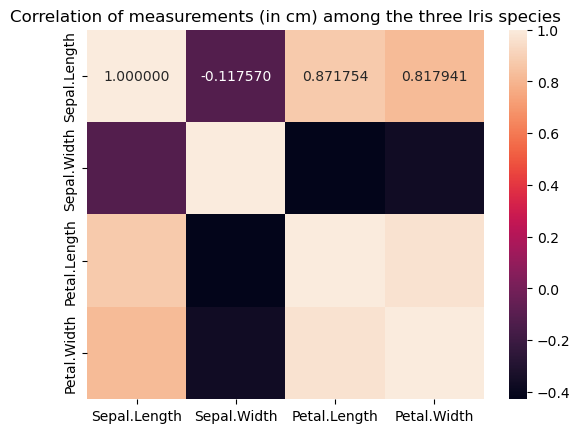

In [3]:
sns.heatmap(dataC.corr(),annot = True, fmt=".6f").set_title("Correlation of measurements (in cm) among the three Iris species")
plt.show()

MACHINE LEARNING

Knowing the nature of this dataset, it is important to shuffle the vector. Additionally, it is also nice to do this to simulate randomness.

In [8]:
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [117]:
data = data.sample(frac=1, random_state=42)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
74,6.1,2.8,4.7,1.2,versicolor
19,5.7,3.8,1.7,0.3,setosa
119,7.7,2.6,6.9,2.3,virginica
79,6.0,2.9,4.5,1.5,versicolor
77,6.8,2.8,4.8,1.4,versicolor


In [118]:
train, test = data[:120], data[120:]

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 74 to 60
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  120 non-null    float64
 1   Sepal.Width   120 non-null    float64
 2   Petal.Length  120 non-null    float64
 3   Petal.Width   120 non-null    float64
 4   Species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


array([[<Axes: title={'center': 'Sepal.Length'}>,
        <Axes: title={'center': 'Sepal.Width'}>],
       [<Axes: title={'center': 'Petal.Length'}>,
        <Axes: title={'center': 'Petal.Width'}>]], dtype=object)

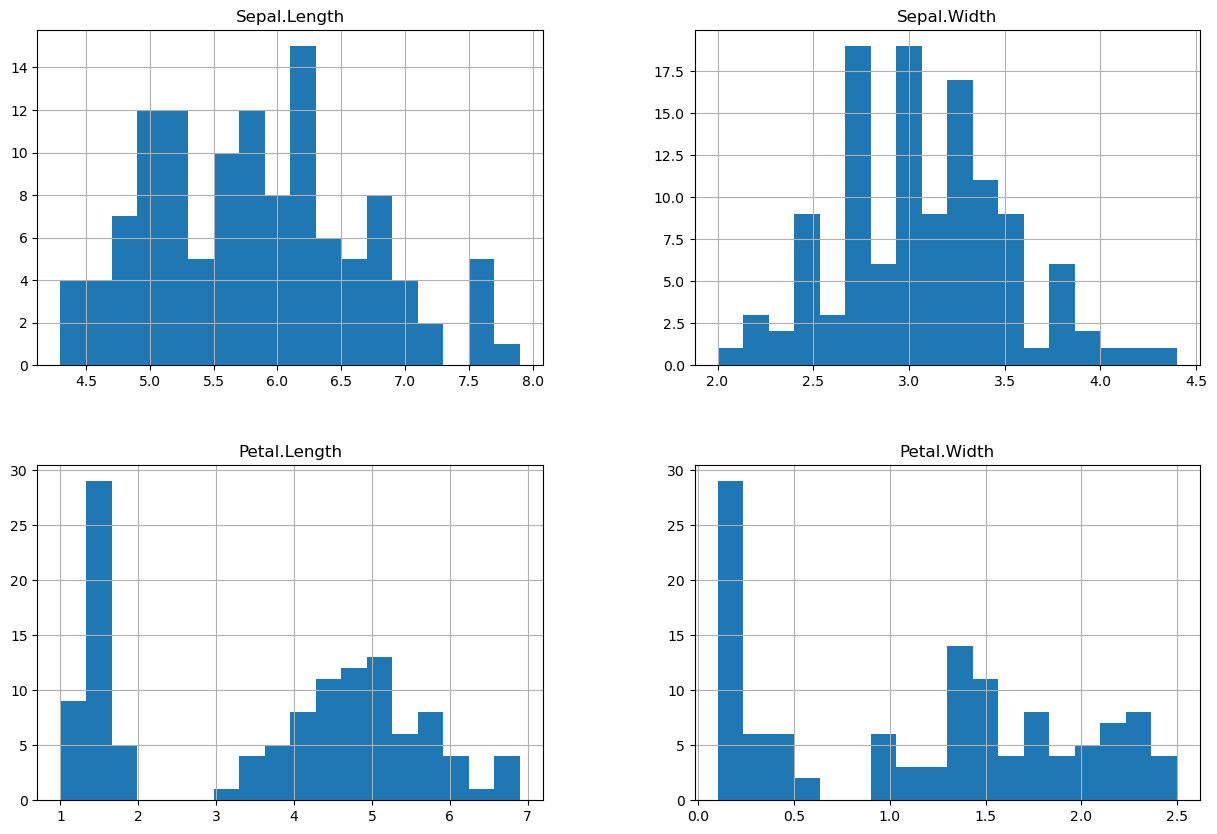

In [120]:
train.hist(bins=18, figsize=(15,10))

The upper row of the boxplot chart below indicates that the distribution of Sepal Length and Sepal Width for the different flowers are quite similar to each other. Nevertheless, Iris-setosa takes on the most extreme values for both features.

The bottom row confirms the suggestion we made on the basis of the above histograms. Iris-setosa flower seems to have very different Petal Length & Width than the other two flowers. Additionally, it can be seen that the (Iris-setosa flower has on both these features a very narrow distribution (-> short boxplot) in comparison to the ones of Iris-versicolor and Iris-virginica, which have a longer boxplot.

This findings assume that the Iris-setosa flower should be the easiest to classify as it is very well distinguishable from the other two flowers. However, this remains to be seen.

In [121]:
numeric_train = train.select_dtypes(include=[float, int])

In [122]:
numeric_train.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.141379,0.884951,0.841669
Sepal.Width,-0.141379,1.000000,-0.438779,-0.374291
Petal.Length,0.884951,-0.438779,1.000000,0.965610
Petal.Width,0.841669,-0.374291,0.965610,1.000000


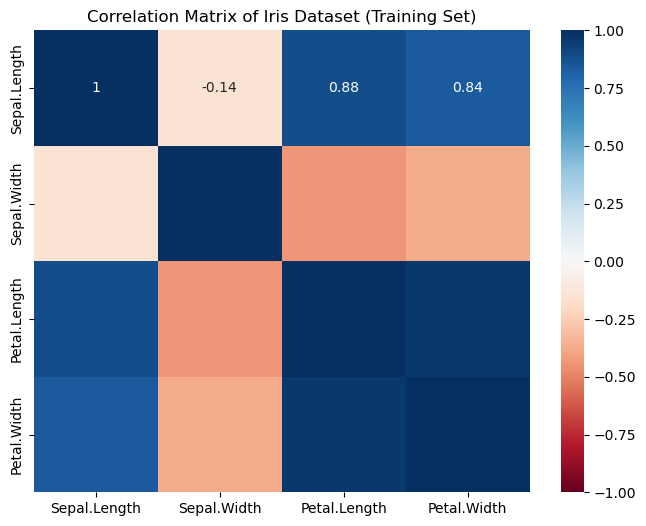

In [24]:
# Calculate the correlation matrix
correlation_matrix = numeric_train.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="RdBu", vmin=-1.0, vmax=1.0, annot=True)
plt.title('Correlation Matrix of Iris Dataset (Training Set)')
plt.show()

DATA PREPARATION

In [123]:
X_train = train.drop("Species", axis=1)
y_train = train["Species"].copy()

X_test = test.drop("Species", axis=1)
y_test = test["Species"].copy()

In [85]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
74,6.1,2.8,4.7,1.2
19,5.7,3.8,1.7,0.3
119,7.7,2.6,6.9,2.3
79,6.0,2.9,4.5,1.5
77,6.8,2.8,4.8,1.4


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("impute", SimpleImputer(strategy="mean"))
])

In [125]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("full", my_pipeline, X_train.columns)
])

In [134]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)
X_train_prepared[:10]

array([[ 0.35853593, -0.62179708,  0.57995336,  0.0355371 ],
       [-0.1248833 ,  1.64615581, -1.10786563, -1.12749524],
       [ 2.29221285, -1.07538766,  1.81768728,  1.45702107],
       [ 0.23768112, -0.3950018 ,  0.46743209,  0.42321455],
       [ 1.20451958, -0.62179708,  0.63621399,  0.29398873],
       [-0.48744772,  0.73897465, -1.2203869 , -0.99826943],
       [-0.24573811, -0.3950018 , -0.0389136 ,  0.16476292],
       [ 1.32537439,  0.05858878,  0.80499589,  1.45702107],
       [ 0.47939074, -1.98256882,  0.46743209,  0.42321455],
       [-0.00402849, -0.84859237,  0.12986829,  0.0355371 ]])

In [ ]:
BASELINE PREDICTIONS

In [77]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [127]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()

scores_knn = cross_val_score(knn_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")
print(scores_knn)
print("mean: ", scores_knn.mean())
print("Std: ", scores_knn.std())


[1.         0.96666667 0.93333333 0.9       ]
mean:  0.9500000000000001
Std:  0.03726779962499649
CPU times: user 22 ms, sys: 7.32 ms, total: 29.3 ms
Wall time: 31.5 ms


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

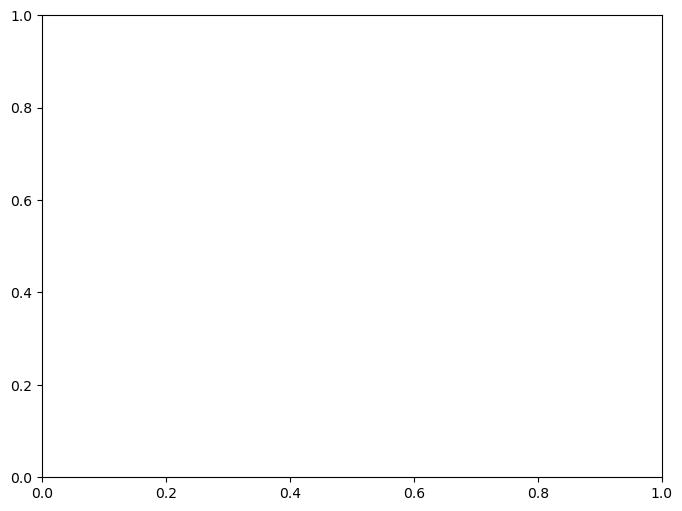

In [97]:
# reduction to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_prepared)
knn_redclf = KNeighborsClassifier()
knn_redclf.fit(X_reduced, y_train)
h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_redclf.predict(mesh_points)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary for KNN (k=5)')
plt.show()


In [128]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

scores_forest = cross_val_score(forest_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")
print(scores_forest)
print("mean: ", scores_forest.mean())
print("Std: ", scores_forest.std())

[1.         0.96666667 0.9        0.9       ]
mean:  0.9416666666666667
Std:  0.04330127018922192
CPU times: user 210 ms, sys: 5 ms, total: 215 ms
Wall time: 214 ms


In [103]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [129]:
%%time
from sklearn.svm import SVC

svm_clf = SVC()

scores_svm = cross_val_score(svm_clf, X_train_prepared, y_train, cv=4, scoring="accuracy")
print(scores_svm)
print("mean: ", scores_svm.mean())
print("Std: ", scores_svm.std())

[1.         0.96666667 0.93333333 0.93333333]
mean:  0.9583333333333335
Std:  0.02763853991962833
CPU times: user 13.7 ms, sys: 3.07 ms, total: 16.7 ms
Wall time: 16.4 ms


In [101]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [130]:
%%time
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

scores_log = cross_val_score(log_reg, X_train_prepared, y_train, cv=4, scoring="accuracy")
print(scores_log)
print("mean: ", scores_log.mean())
print("Std: ", scores_log.std())

[1.         0.96666667 0.93333333 0.96666667]
mean:  0.9666666666666668
Std:  0.02357022603955158
CPU times: user 22.6 ms, sys: 6.39 ms, total: 29 ms
Wall time: 34.8 ms


In [105]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

Logistic Regression has the highest accuracy of the five algorithms, with Random Forest, KNN and SVC right beneath.

As a next step we want to analyze the importance of the features used. The easiest way is through Random Forest's in-built feature importance attribute featureimportances. It shows us that the Petal Length & Width features are way more important for the classification of the flowers than the Sepal Length & Width features.

In [131]:
forest_clf.fit(X_train_prepared, y_train)
print("Feature Importances Random Forest")
print(f"Sepal Length: {forest_clf.feature_importances_[0]}")
print(f"Sepal Width: {forest_clf.feature_importances_[1]}")
print(f"Petal Length: {forest_clf.feature_importances_[2]}")
print(f"Petal Width: {forest_clf.feature_importances_[3]}")

Feature Importances Random Forest
Sepal Length: 0.10737824392298122
Sepal Width: 0.022747888181651143
Petal Length: 0.4036549097741906
Petal Width: 0.46621895812117703


ERROR Analysis

In [34]:
y_train.value_counts()

Species
setosa        43
versicolor    39
virginica     38
Name: count, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

preds_log = cross_val_predict(log_reg, X_train_prepared, y_train, cv=4)
preds_forest = cross_val_predict(forest_clf, X_train_prepared, y_train, cv=4)
preds_svm = cross_val_predict(svm_clf, X_train_prepared, y_train, cv=4)
preds_knn = cross_val_predict(knn_clf, X_train_prepared, y_train, cv=4)

print(f"Actual predictions: {preds_log[:10]}")

Actual predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


In [112]:
print("Confusion matrix Random Forest")
print(confusion_matrix(y_train, preds_forest))
print("______")
print("Confusion matrix KNN")
print(confusion_matrix(y_train, preds_knn))
print("______")
print("Confusion matrix SVC")
print(confusion_matrix(y_train, preds_svm))
print("______")  
print("Confusion matrix Logistic Regression")
print(confusion_matrix(y_train, preds_log))


Confusion matrix Random Forest
[[43  0  0]
 [ 0 36  3]
 [ 0  2 36]]
______
Confusion matrix KNN
[[43  0  0]
 [ 0 37  2]
 [ 0  4 34]]
______
Confusion matrix SVC
[[43  0  0]
 [ 0 37  2]
 [ 0  3 35]]
______
Confusion matrix Logistic Regression
[[43  0  0]
 [ 0 37  2]
 [ 0  2 36]]


In [39]:
errors_forest = np.array(y_train == preds_forest)
errors_knn = np.array(y_train == preds_knn)
errors_svm = np.array(y_train == preds_svm)
errors_log = np.array(y_train == preds_log)

error_idxs_forest = list(np.argwhere(errors_forest==False).flatten())
error_idxs_knn = list(np.argwhere(errors_knn==False).flatten())
error_idxs_svm = list(np.argwhere(errors_svm==False).flatten())
error_idxs_log = list(np.argwhere(errors_log==False).flatten())

In [40]:
errors_overall = error_idxs_forest.copy()
errors_overall.extend(error_idxs_knn)
errors_overall.extend(error_idxs_svm)
errors_overall.extend(error_idxs_log)
error_idxs_overall = sorted(set(errors_overall))
print(error_idxs_overall)

[46, 72, 84, 89, 92, 93, 98, 103]


In [41]:
errors = data.iloc[list(error_idxs_overall)]
errors

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
134,6.3,2.8,5.1,1.5,virginica
139,6.0,3.0,4.8,1.8,virginica
78,6.7,3.0,5.0,1.7,versicolor
71,5.9,3.2,4.8,1.8,versicolor
84,6.0,2.7,5.1,1.6,versicolor
135,6.1,2.6,5.6,1.4,virginica
120,6.0,2.2,5.0,1.5,virginica
73,6.3,2.5,4.9,1.5,versicolor


In [135]:
classifiers = {
    "forest_clf": forest_clf,
    "knn_clf": knn_clf,
    "svm_clf": svm_clf,
    "log_reg": log_reg
}
from sklearn.metrics import accuracy_score
testset_scores(classifiers, X_train_prepared, y_train, X_test_prepared, y_test)

forest_clf : 0.9
knn_clf : 0.9
svm_clf : 0.9
log_reg : 0.9333333333333333


LEARNING CURVE - overfit vs underfit

In [42]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, X, y):
    #Get training sizes
    training_sizes = np.linspace(1, (len(X) * (3/4)), 10).round().astype("int64")
    training_sizes[0] = 5
    #Learning curve values
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y_train, train_sizes=training_sizes, 
                                                       cv=4, scoring="accuracy")
    #get means of cross validation
    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    #plot data
    plt.figure(figsize=(12,6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score")
    plt.title(f"{estimator}")
    plt.xlabel("Training Sizes")
    plt.ylabel("Accuracy")
    plt.xlim(0, 95)
    plt.legend()
    print("Training score means: ", train_scores_mean)
    print("Validation score means: ", val_scores_mean)

Training score means:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation score means:  [0.625      0.93333333 0.95       0.94166667 0.96666667 0.95833333
 0.96666667 0.95833333 0.95833333 0.95833333]


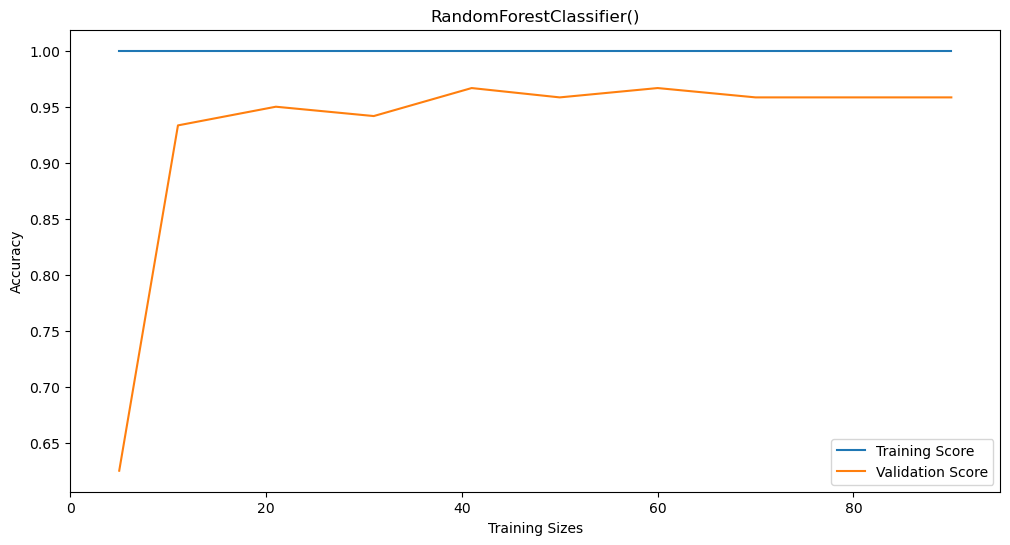

In [43]:
plot_learning_curves(forest_clf, X_train_prepared, y_train) 

Indicative that random forest model performs perfectly in our training dataset but performs low on our validation / test set. This gap between training and validation accuracy is rather big, which means that the model has high variance. In conclusion, we can say that the Random Forest model overfits.

Training score means:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation score means:  [0.64166667 0.94166667 0.94166667 0.94166667 0.95833333 0.95
 0.95833333 0.95833333 0.95833333 0.95      ]


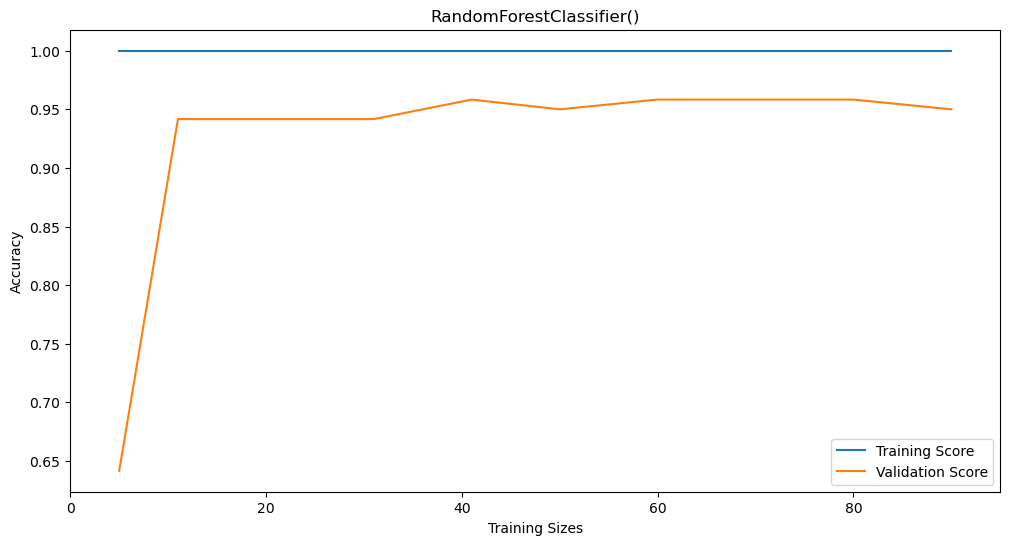

In [44]:
plot_learning_curves(forest_clf, X_train_prepared, y_train)

Training score means:  [0.6        0.77272727 0.95238095 0.98387097 0.98780488 0.985
 0.98333333 0.96428571 0.95625    0.96388889]
Validation score means:  [0.33333333 0.48333333 0.85833333 0.9        0.96666667 0.95833333
 0.96666667 0.95       0.94166667 0.95      ]


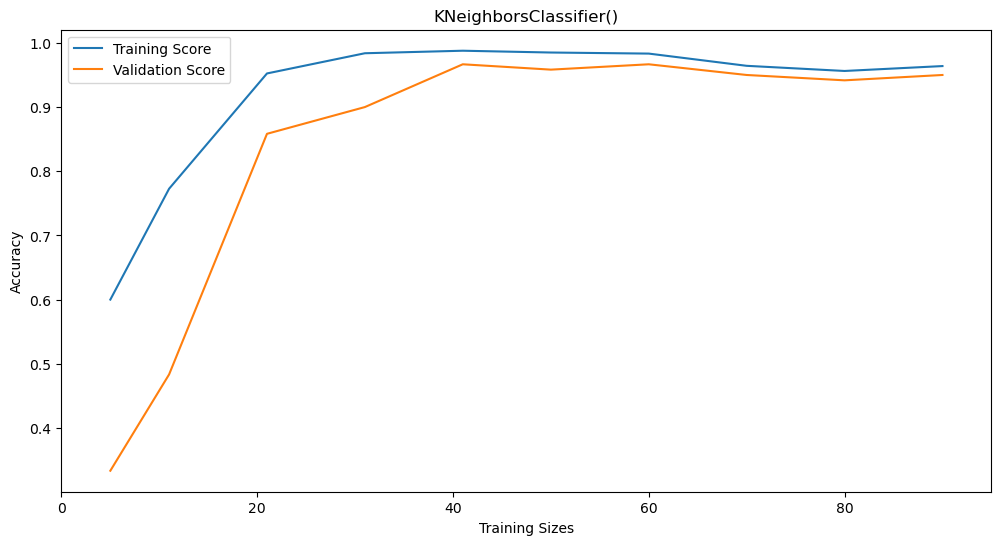

In [45]:
plot_learning_curves(knn_clf, X_train_prepared, y_train)

Training score means:  [1.         0.97727273 0.98809524 0.99193548 0.98170732 0.98
 0.975      0.96785714 0.9625     0.96666667]
Validation score means:  [0.66666667 0.78333333 0.9        0.9        0.95       0.975
 0.96666667 0.94166667 0.94166667 0.95833333]


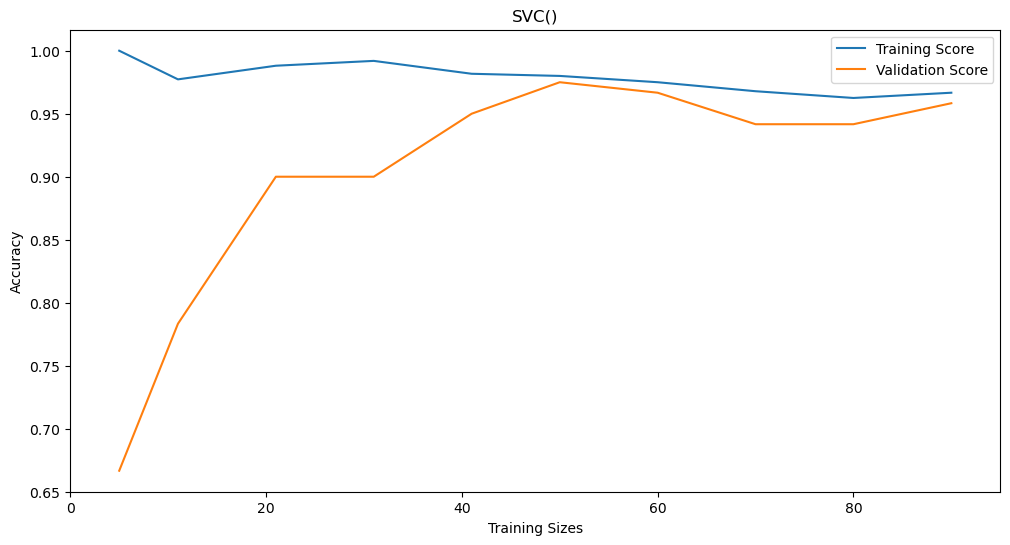

In [46]:
plot_learning_curves(svm_clf, X_train_prepared, y_train)

Training score means:  [1.         0.97727273 1.         0.97580645 1.         0.985
 0.975      0.96785714 0.965625   0.96944444]
Validation score means:  [0.60833333 0.73333333 0.89166667 0.88333333 0.95       0.95
 0.96666667 0.95       0.95833333 0.96666667]


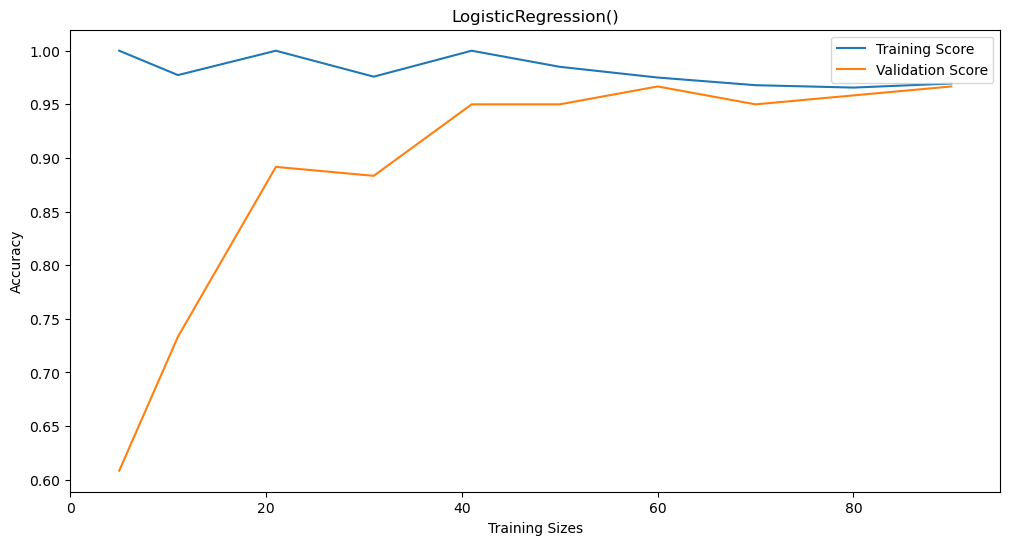

In [47]:
plot_learning_curves(log_reg, X_train_prepared, y_train)

For the next three models it's different. The training accuracy isn't perfect anymore (-> bias is a bit higher), instead the gap between training and validation accuracy is smaller than for the Random Forest model (-> lower variance). Especially the learning curve for the logistic regression look very promising. In general these two models seem to generalize rather well. However, maybe we can get even a slight improvement out of the hypterparamter tuning, so that the bias lowers but the variance is kept at the same level.

Feature engineering

So, now we have seen that our models perform quite well with accuracies from 95% to 96.6%. We also have seen that our four models make a total of 20 errors on eight different examples. In addition, all these errors are made on Iris-versicolor and Iris-virginica flowers.

Last but not least, we have seen that the Random Forest model overfits, while the models of SVC and Logistic Regression have a slightly higher bias. Therefore, we will try to lower the bias of the latter two models through creating new features. This is no problem for the Random Forest Classifier, because we can just regularize it even more than we would have had to without additional features.

The goal for the feature engineering has to be that the Iris-versicolor & -virginica flowers are better distinguishable from each other. The distributions of these two flowers are less overlapping on the Petal features than on the Sepal features (see boxplots). Therefore, we raise these two features to higher power and divide them through other features. It seems as the features below are the best.

Now we have to add them to training as well as to the test data.

In [52]:
train["relations_length"] = train["Petal.Length"]**3 / train["Sepal.Length"]
train["relations_petal"] = train["Petal.Length"]**3 / train["Petal.Width"]
train["relations_width"] = train["Petal.Width"]**3 / train["Sepal.Width"]

test["relations_length"] = test["Petal.Length"]**3 / test["Sepal.Length"]
test["relations_petal"] = test["Petal.Length"]**3 / test["Petal.Width"]
test["relations_width"] = test["Petal.Width"]**3 / test["Sepal.Width"]

/var/folders/v9/0pzvy7hj32qcxsmch60p70400000gn/T/ipykernel_78034/2827002762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["relations_length"] = train["Petal.Length"]**3 / train["Sepal.Length"]
/var/folders/v9/0pzvy7hj32qcxsmch60p70400000gn/T/ipykernel_78034/2827002762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["relations_petal"] = train["Petal.Length"]**3 / train["Petal.Width"]
/var/folders/v9/0pzvy7hj32qcxsmch60p70400000gn/T/ipykernel_78034/2827002762.py:3: SettingWithCopyWarning

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 74 to 60
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sepal.Length      120 non-null    float64
 1   Sepal.Width       120 non-null    float64
 2   Petal.Length      120 non-null    float64
 3   Petal.Width       120 non-null    float64
 4   Species           120 non-null    object 
 5   relations_length  120 non-null    float64
 6   relations_petal   120 non-null    float64
 7   relations_width   120 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.4+ KB


array([[<Axes: title={'center': 'relations_length'}>,
        <Axes: title={'center': 'relations_petal'}>],
       [<Axes: title={'center': 'relations_width'}>, <Axes: >]],
      dtype=object)

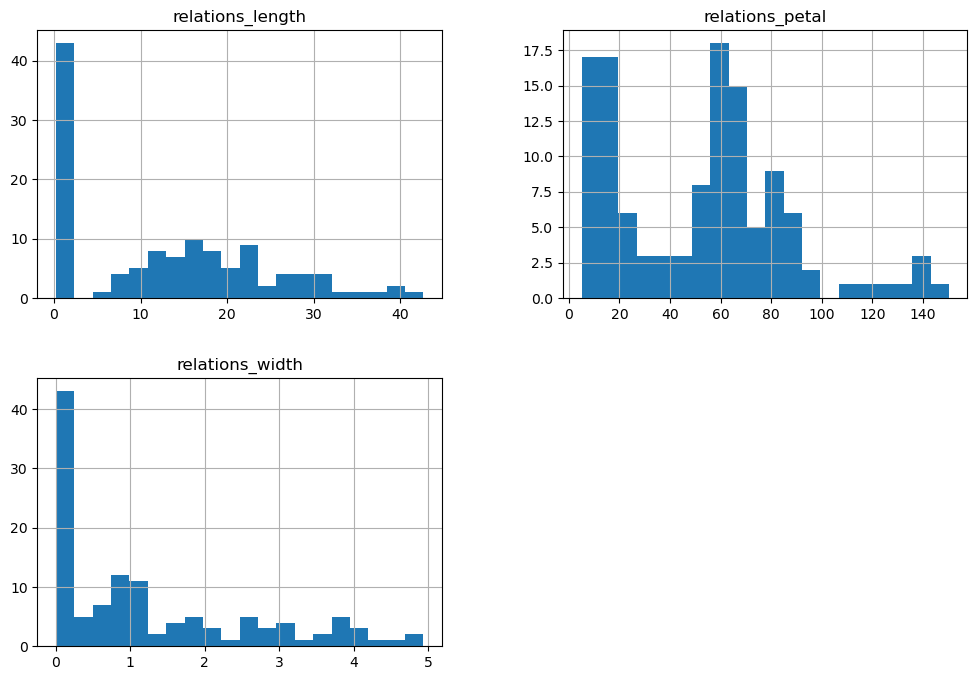

In [54]:
train[["relations_length", "relations_petal", "relations_width"]].hist(bins=20, figsize=(12,8))

<Axes: xlabel='Species', ylabel='relations_length'>

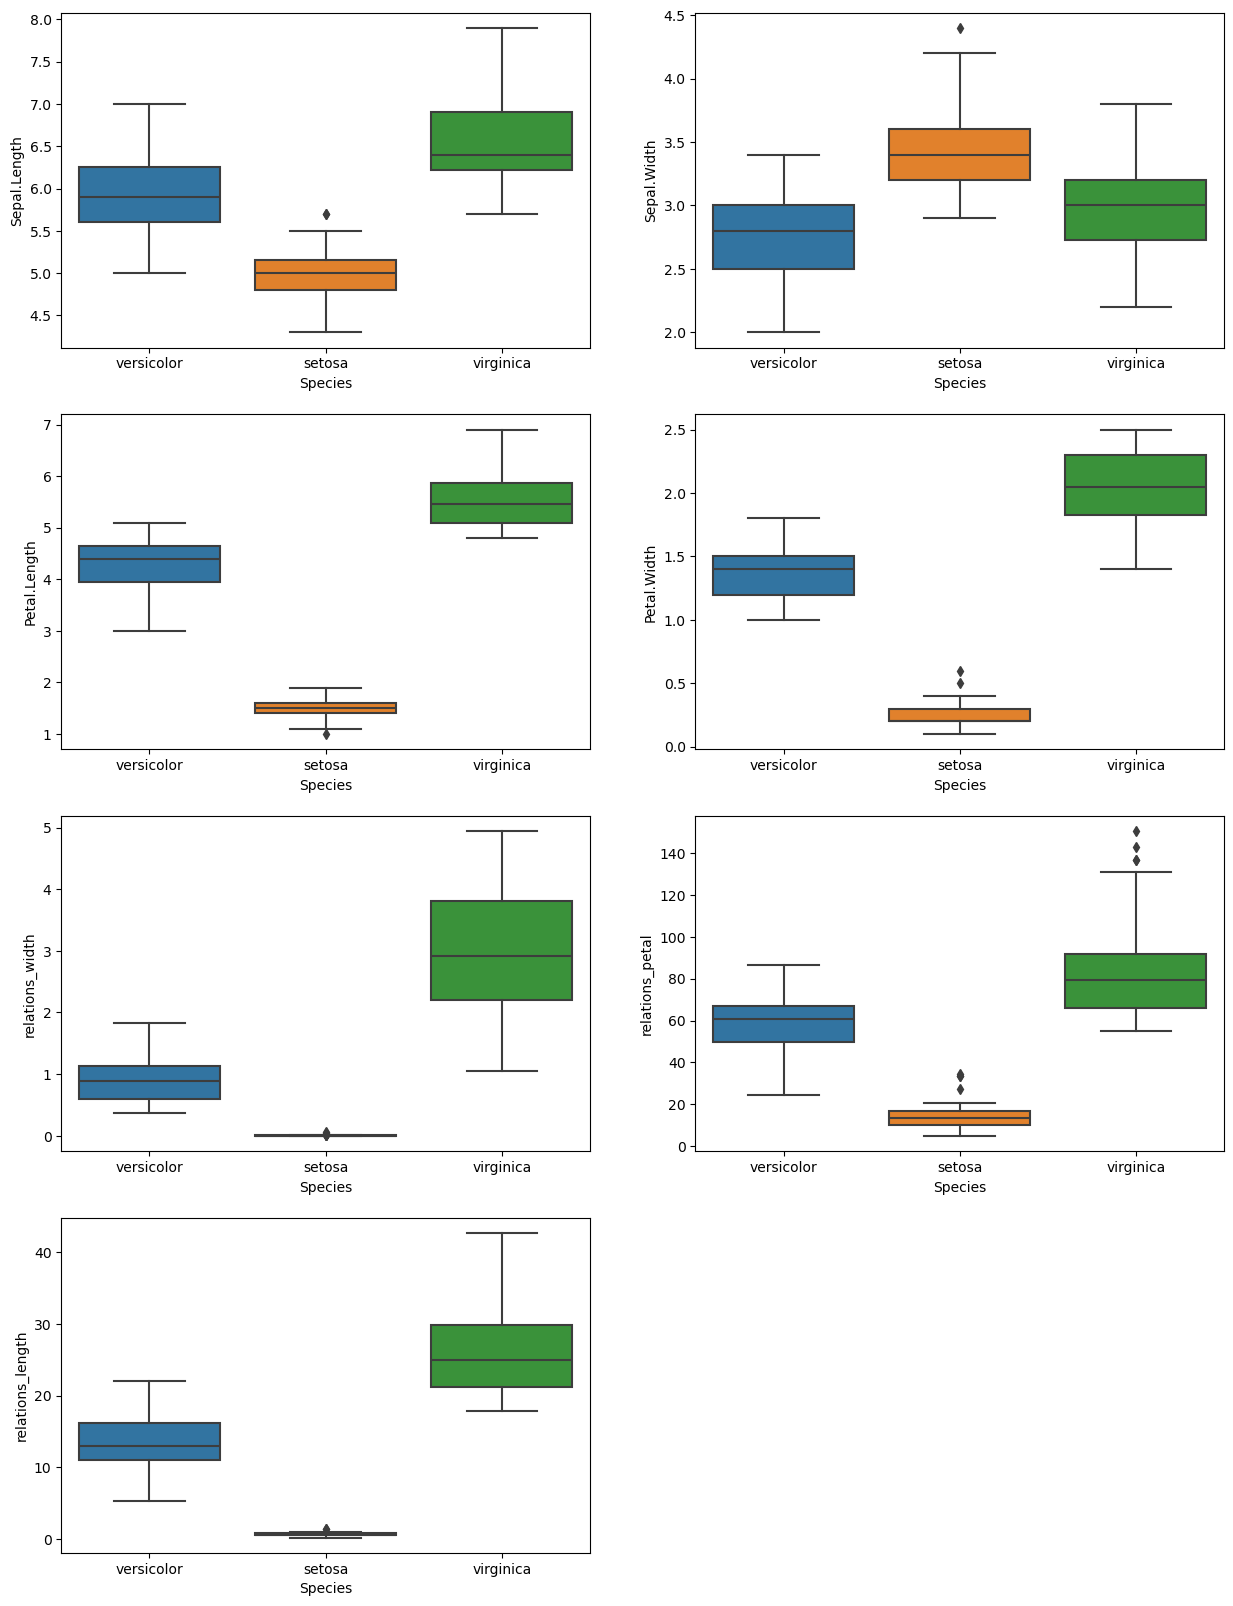

In [56]:
plt.figure(figsize=(15,20))
plt.subplot(421)
sns.boxplot(y="Sepal.Length", x="Species", data=train)
plt.subplot(422)
sns.boxplot(y="Sepal.Width", x="Species", data=train)
plt.subplot(423)
sns.boxplot(y="Petal.Length", x="Species", data=train)
plt.subplot(424)
sns.boxplot(y="Petal.Width", x="Species", data=train)
plt.subplot(425)
sns.boxplot(y="relations_width", x="Species", data=train)
plt.subplot(426)
sns.boxplot(y="relations_petal", x="Species", data=train)
plt.subplot(427)
sns.boxplot(y="relations_length", x="Species", data=train)

In [57]:
X_train_new = train.drop("Species", axis=1)
X_test_new = test.drop("Species", axis=1)

#full_pipeline_new put maybe later 
full_pipeline_new = ColumnTransformer([
    ("full", my_pipeline, X_train_new.columns)
])

X_train_new_prepared = full_pipeline_new.fit_transform(X_train_new)
X_test_new_prepared = full_pipeline_new.transform(X_test_new)

Hyperparameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    "n_estimators": [10, 12, 15, 20],
    "max_depth": [15, 20, 30, 40],
    "max_leaf_nodes": [5, 8, 10, 20, 30]
}

grid_forest = GridSearchCV(forest_clf, param_grids, scoring="accuracy", cv=4)

grid_forest.fit(X_train_new_prepared, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 20, 30, 40],
                         'max_leaf_nodes': [5, 8, 10, 20, 30],
                         'n_estimators': [10, 12, 15, 20]},
             scoring='accuracy')

In [59]:
grid_forest.best_estimator_

RandomForestClassifier(max_depth=15, max_leaf_nodes=5, n_estimators=10)

In [60]:
forest_clf = grid_forest.best_estimator_

scores_forest_new = cross_val_score(forest_clf, X_train_new_prepared, y_train, cv=4, scoring="accuracy")

print(scores_forest_new)
print(scores_forest_new.mean())
print(scores_forest_new.std())

[1.         0.96666667 0.93333333 0.93333333]
0.9583333333333335
0.02763853991962833


In [61]:
forest_clf.fit(X_train_new_prepared, y_train)

print("Feature Importances Random Forest")
print(f"Sepal Length: {forest_clf.feature_importances_[0]}")
print(f"Sepal Width: {forest_clf.feature_importances_[1]}")
print(f"Petal Length: {forest_clf.feature_importances_[2]}")
print(f"Petal Width: {forest_clf.feature_importances_[3]}")
print(f"Realtions Width: {forest_clf.feature_importances_[4]}")
print(f"Relations Petal: {forest_clf.feature_importances_[5]}")
print(f"Relations Length: {forest_clf.feature_importances_[6]}")

Feature Importances Random Forest
Sepal Length: 0.02347146877065229
Sepal Width: 0.0
Petal Length: 0.27829741888188025
Petal Width: 0.30502911990186105
Realtions Width: 0.3059301249523415
Relations Petal: 0.0
Relations Length: 0.08727186749326504


In [62]:
param_grids = {
    "n_neighbors": np.arange(1,11),
    "weights": ["uniform", "distance"],
    "leaf_size": [20, 30, 40]
}

grid_knn = GridSearchCV(knn_clf, param_grids, cv=4, scoring="accuracy")

grid_knn.fit(X_train_new_prepared, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 40],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [63]:
grid_knn.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=6, weights='distance')

In [64]:
knn_clf = grid_knn.best_estimator_

scores_knn_new = cross_val_score(knn_clf, X_train_new_prepared, y_train, cv=4, scoring="accuracy")
print(scores_knn_new)
print(scores_knn_new.mean())
print(scores_knn_new.std())

[1.         0.96666667 1.         0.96666667]
0.9833333333333334
0.016666666666666663


In [65]:
param_grids = {
    "C": [1, 10, 30, 100],
    "kernel": ["rbf", "linear", "sigmoid"],
    "gamma": ["auto", "scale"],
    "decision_function_shape": ["ovo", "ovr"]
}

grid_svm = GridSearchCV(svm_clf, param_grids, scoring="accuracy", cv=4)

grid_svm.fit(X_train_new_prepared, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 10, 30, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='accuracy')

In [66]:
grid_svm.best_estimator_

SVC(C=1, decision_function_shape='ovo', gamma='auto')

In [67]:
svm_clf = grid_svm.best_estimator_

scores_svm_new = cross_val_score(svm_clf, X_train_new_prepared, y_train, cv=4, scoring="accuracy")

print(scores_svm_new)
print(scores_svm_new.mean())
print(scores_svm_new.std())

[1.         0.96666667 1.         0.96666667]
0.9833333333333334
0.016666666666666663


In [68]:
log_reg = LogisticRegression()

param_grids = {
    "C": [1.0, 3.0, 10.0, 50.0],
    "max_iter": [50, 100, 200, 1000],
    "multi_class": ["auto", "ovr", "multinomial"],
}

grid_log = GridSearchCV(log_reg, param_grids, cv=4, scoring="accuracy")

grid_log.fit(X_train_new_prepared, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 3.0, 10.0, 50.0],
                         'max_iter': [50, 100, 200, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial']},
             scoring='accuracy')

In [69]:
grid_log.best_estimator_

LogisticRegression(max_iter=50)

In [70]:
log_reg = grid_log.best_estimator_

scores_log_new = cross_val_score(log_reg, X_train_new_prepared, y_train, cv=4, scoring="accuracy")

print(scores_log_new)
print(scores_log_new.mean())
print(scores_log_new.std())

[1.         0.96666667 0.96666667 0.96666667]
0.9750000000000001
0.01443375672974064


In [71]:
print(f"Before Tuning: {scores_forest.mean()} After Tuning: {scores_forest_new.mean()} (Random Forest)")
print(f"Before Tuning: {scores_knn.mean()} After Tuning: {scores_knn_new.mean()} (KNN)")
print(f"Before Tuning: {scores_svm.mean()} After Tuning: {scores_svm_new.mean()} (SVC)")
print(f"Before Tuning: {scores_log.mean()} After Tuning: {scores_log_new.mean()} (Logistic Regression)")

Before Tuning: 0.95 After Tuning: 0.9583333333333335 (Random Forest)
Before Tuning: 0.9500000000000001 After Tuning: 0.9833333333333334 (KNN)
Before Tuning: 0.9583333333333335 After Tuning: 0.9833333333333334 (SVC)
Before Tuning: 0.9666666666666668 After Tuning: 0.9750000000000001 (Logistic Regression)


In [72]:
classifiers = {
    "forest_clf": forest_clf,
    "knn_clf": knn_clf,
    "svm_clf": svm_clf,
    "log_reg": log_reg
}

In [73]:
def testset_scores(clf, X_train, y_train, X_test, y_test):
    for key, value in classifiers.items():
        clf = value
        clf.fit(X_train, y_train)
        y_preds = clf.predict(X_test)
        print(key,":", accuracy_score(y_test, y_preds))

In [74]:
from sklearn.metrics import accuracy_score

testset_scores(classifiers, X_train_new_prepared, y_train, X_test_new_prepared, y_test)

forest_clf : 0.9666666666666667
knn_clf : 0.9666666666666667
svm_clf : 0.9666666666666667
log_reg : 1.0
